# Análise Fatorial Exploratória

Nesta atividade iremos trabalho com um conjunto de dados od [ifood](https://www.kaggle.com/datasets/jackdaoud/marketing-data). Este conjunto sofreu um pre tratamento para podermos focar mais na análise fatorial.

## Atividade 1: Importe os dados e verifique se há dados faltantes. Se houver dados faltantes, faça os tratamentos adequados.

In [ ]:
# importando biblioteca pandas
import pandas as pd

In [ ]:
# Criando biblioteca no Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#criando DataFrame df com os dados do dataset do Ifood
df = pd.read_excel('/content/drive/MyDrive/arquivos/ifood2.xlsx')
df.head()

,ID,ano_nascimento,nivel_educacao,estado_civil,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,...,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta,reclamou_ult_2anos
0,6862,1971,graduado,divorciado,650.38,0,0,42,65,1,...,3,1,1,15,0,0,0,20,0,0
1,5376,1979,graduado,casado,919.92,1,0,539,42,1,...,1725,1,1,15,0,28,0,1,0,0
2,11110,1973,graduado,solteiro,1316.54,1,0,442,56,2,...,1,0,0,0,0,0,0,14,0,0
3,9931,1963,doutorado,casado,1512.41,1,1,6,29,5,...,1,1,1,15,0,0,0,19,0,0
4,10311,1969,graduado,casado,1664.66,0,1,267,0,16,...,12,2,4,0,25,0,0,1,0,0


In [ ]:
#verificando se há dados faltantes no dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            2236 non-null   int64  
 1   ano_nascimento                2236 non-null   int64  
 2   nivel_educacao                2236 non-null   object 
 3   estado_civil                  2236 non-null   object 
 4   renda_mensal                  2236 non-null   float64
 5   num_filhos_pequenos           2236 non-null   int64  
 6   num_filhos_adolescentes       2236 non-null   int64  
 7   num_dias_primeira_compra      2236 non-null   int64  
 8   num_dias_ultima_compra        2236 non-null   int64  
 9   gasto_vinho_ult_2anos         2236 non-null   int64  
 10  gasto_prod_frutas_ult_2anos   2236 non-null   int64  
 11  gasto_prod_carne_ult_2anos    2236 non-null   int64  
 12  gasto_prod_peixe_ult_2anos    2236 non-null   int64  
 13  gas

Não há dados faltantes.

In [ ]:
# verificando valores ausentes para cada coluna
df.isnull().sum()

ID                              0
ano_nascimento                  0
nivel_educacao                  0
estado_civil                    0
renda_mensal                    0
num_filhos_pequenos             0
num_filhos_adolescentes         0
num_dias_primeira_compra        0
num_dias_ultima_compra          0
gasto_vinho_ult_2anos           0
gasto_prod_frutas_ult_2anos     0
gasto_prod_carne_ult_2anos      0
gasto_prod_peixe_ult_2anos      0
gasto_prod_doces_ulti_2anos     0
qtde_compras_desconto           0
qtde_compras_web_restaurante    0
qtde_compras_catalogo           0
qtde_compras_loja               0
qtde_vistas_web_ult_mes         0
aceitou_qtde_oferta             0
reclamou_ult_2anos              0
dtype: int64

Não há valores faltantes.

## Atividade 2: Faça uma preparação dos dados, isto é, elimine colunas irrelevantes e transforme colunas categóricas usando One Hot Encoding.

In [ ]:
df['nivel_educacao'].value_counts()

graduado        1126
doutorado        484
mestrado         369
pos              203
ensino_medio      54
Name: nivel_educacao, dtype: int64

In [ ]:
df['estado_civil'].value_counts()

casado        864
vive_junto    580
solteiro      480
divorciado    232
viuvo          77
sozinho         3
Name: estado_civil, dtype: int64

Achados no dataset:

*   A coluna ID é um identificador único de cliente
*   Há 3 colunas categóricas e estas não interessam à análise fatorial: nivel_educacao, estado_civil, reclamou_ult_2anos (tratando-se de 1 = sim e 0 = não).

In [ ]:
# Dercartando as colunas ID, nivel_educacao, estado_civil, reclamou_ult_2anos
df = df.drop(['ID',
              'nivel_educacao',
              'estado_civil',
              'reclamou_ult_2anos'
              ],
             axis=1)

df.head()

,ano_nascimento,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,gasto_prod_frutas_ult_2anos,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta
0,1971,650.38,0,0,42,65,1,1,3,1,1,15,0,0,0,20,0
1,1979,919.92,1,0,539,42,1,1,1725,1,1,15,0,28,0,1,0
2,1973,1316.54,1,0,442,56,2,1,1,0,0,0,0,0,0,14,0
3,1963,1512.41,1,1,6,29,5,0,1,1,1,15,0,0,0,19,0
4,1969,1664.66,0,1,267,0,16,4,12,2,4,0,25,0,0,1,0


In [ ]:
#alterando coluna ano_nascimento para idade
df['ano_nascimento'] = 2023 - df['ano_nascimento']

In [ ]:
#alterando o nome da coluna ano_nascimento para idade
df.rename(columns={'ano_nascimento' : 'idade'},
               inplace=True)

df.head()

,idade,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,gasto_prod_frutas_ult_2anos,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta
0,52,650.38,0,0,42,65,1,1,3,1,1,15,0,0,0,20,0
1,44,919.92,1,0,539,42,1,1,1725,1,1,15,0,28,0,1,0
2,50,1316.54,1,0,442,56,2,1,1,0,0,0,0,0,0,14,0
3,60,1512.41,1,1,6,29,5,0,1,1,1,15,0,0,0,19,0
4,54,1664.66,0,1,267,0,16,4,12,2,4,0,25,0,0,1,0


Não foi utilizado o One Hot Encoding, pois as variáveis categóricas foram descartadas para a análise fatorial.

In [ ]:
#importanto biblioteca seaborn
import seaborn as sns

In [ ]:
# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

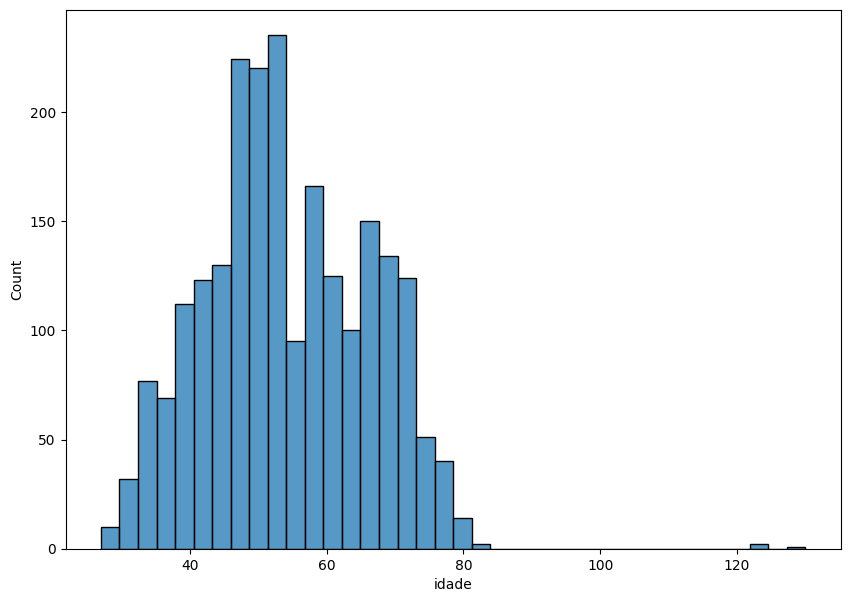

In [ ]:
#Plotando histograma da variável idade
fig, ax = plt.subplots(figsize=(10,7))
sns.histplot(data=df, x="idade");

In [ ]:
# assumindo a premissa que os clientes tem menos de 100 anos
df = df[(df['idade']  < 100)]

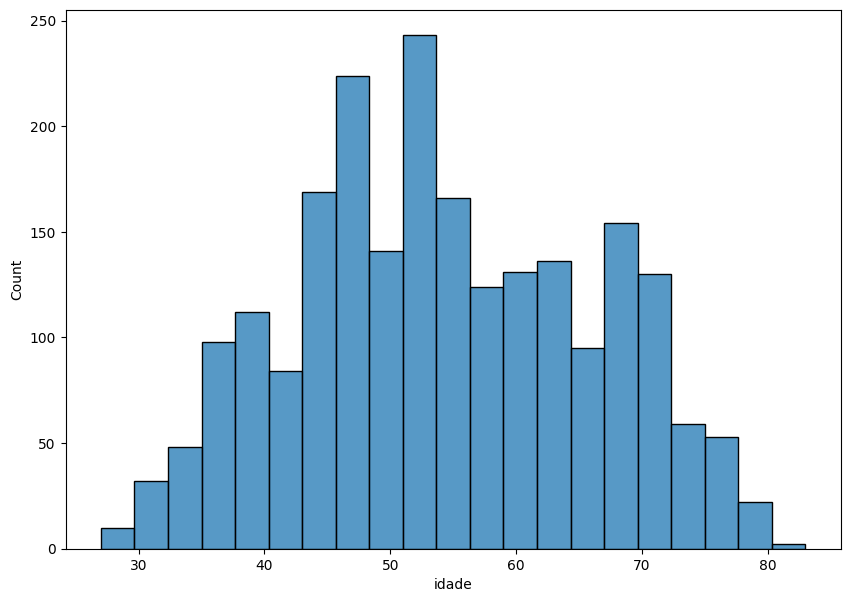

In [ ]:
#Plotando histograma da variável idade com a premissa assumida acima
fig, ax = plt.subplots(figsize=(10,7))
sns.histplot(data=df, x="idade");

## Atividade 3: Coloque os dados numa mesma escala e faça um heatmap para observar a correlação.

In [ ]:
# importando StandardScaler
from sklearn.preprocessing import StandardScaler

# instanciando a função
scaler = StandardScaler()

# criando uma cópia dos valores
df_scaled = df.copy()

# aplicando a padronização
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

df_scaled.head()

In [ ]:
# plotando heatmap
# Mapa de Calor para verificar a correlação entre as variáveis, pois na análise fatorial, pressupões que todas as variáveis estão correlacionadas
sns.heatmap(df_scaled.corr(), vmin=-1, vmax=1, annot=False);

## Atividade 4: Há um grupo de variáveis que trazem informações muito parecidas e possuem correlação entre si. Transforme todas essas variáveis em uma única.

Essa tarefa será delegada ao processo de análise fatorial.

## Atividade 5: Faça e teste de esfericidade de Bartlett e conclua se as variáveis estão correlacionadas.

Para realizar esse teste em `Python` usaremos a função `calculate_bartlett_sphericity` do pacote `factor_analyzer`.

**Atenção!** Este pacote não vem instalado por padrão! Para instalá-lo use o comando `!pip install factor_analyzer`.

A função que desejamos está no pacote `factor_analyzer` dentro do módulo `factor_analyzer`.

Para mais detalhes consulte a documentação do pacote [aqui](https://factor-analyzer.readthedocs.io/en/latest/index.html).

Está função retornará para nós dois valores: a estatística qui quadrado do teste e o p-valor. Consideraremos um nível de significância de 5%.

In [ ]:
# Necessário instalar o pacote cada vez que for rodar o colab
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 35.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=674d8a91f323b8a6c8a0a9189b2eb5b316e4e3325e2d9bb1f041101fdd07313b
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


In [ ]:
# importando a funcao e realizando o teste
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#a função acima retorna 2 valores: estatística do teste (quiquadrado) e p-valor
#chi_square, p_valor será o retorno da função
chi_square, p_valor = calculate_bartlett_sphericity(df_scaled)
#interesse em retornar o p-valor
print(f"A estatística do teste é {chi_square} e seu respectivo p-valor é {p_valor}")

A estatística do teste é 16350.98670112681 e seu respectivo p-valor é 0.0


Como o p valor é menor que 0.05 podemos rejeitar a hipótese nula, isto é, podemos considerar que há correlação entre todas as variáveis.

Portanto, podemos proceder com a análise fatorial.

## Atividade 6: Obtenha a medida de Kaiser-Meyer-Olkin e conclua se a análise fatorial é indicada.

Pequenos valores de KMO indicam que as correlações entre os pares de variáveis não podem ser explicadas por outras variáveis, indicando que a análise fatorial não é adequada.
KMO sempre varia entre 0 e 1, quanto maior melhor. Resultados abaixo de 0.5 indicam que análise fatorial não é adequada.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
#a função acima retorna o valor kmo de todas as variáveis e do modelo
kmo_all, kmo_model = calculate_kmo(df_scaled)
#interesse em retornar o valor kmo_model
kmo_model

0.8722961734896166

Como o valor é alto, classificação ótima, podemos proceder com a análise fatorial.

## Atividade 7: Encontre o número adequado de fatores para este problema.

Para isso vamos usar a função `FactorAnalyzer` e o método `get_eigenvalues()` aplicado ao um objeto da classe `FactorAnalyzer`, após este calcular valores dos dados.

O método `get_eigenvalues()` retorna dois objetos, sendo que o primeiro são os autovalores.

In [ ]:
# importando a função FactorAnalyzer
from factor_analyzer import FactorAnalyzer

# criando um objeto para fazer análise fatorial (não há rotação no momento)
fa = FactorAnalyzer(rotation=None)

# aplicando a análise fatorial aos dados [apresentando os dados para o objeto fa; .fit para fazer o ajuste]
fa.fit(df_scaled)

# obtendo os autovalores (autovalores = eigenvalue = ev) (v = vetores)
ev, v = fa.get_eigenvalues()
#interesse em retornar o valor ev
ev

array([5.92151727, 2.00891254, 1.42677516, 1.12303733, 0.97712618,
       0.845517  , 0.71883385, 0.65518797, 0.52067003, 0.47727322,
       0.45545863, 0.41706583, 0.39298698, 0.31397269, 0.28879626,
       0.25133715, 0.20553193])

Note que temos apenas 4 autovalores maiores que 1, portanto temos 4 fatores para os nosso dados. Um dos valores é bem próximo de 1, então poderíamos também considerar 3 fatores.

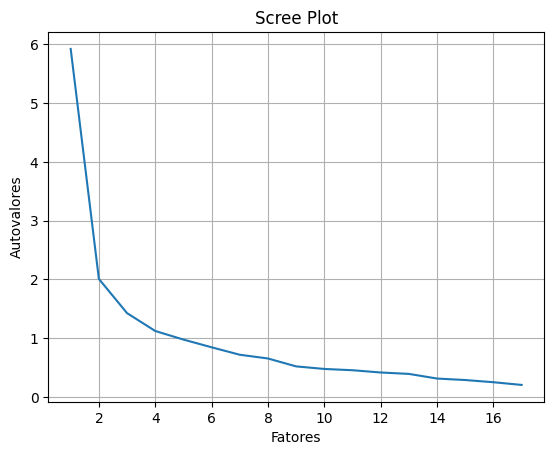

In [ ]:
# Uma quantidade muito grande de valores pode tornar difícil essa leitura, portanto vamos usar um gráfico para facilitar.

# importando matplotlib para fazer algumas customizações no gráfico
import matplotlib.pyplot as plt

# Criando um scree plot
#range cria uma sequência que começa em 1 e vai até a quantidade máxima de colunas do df_scaled (qde máxima de fatores)
#.shape retorna a quantidade de linhas e colunas; indice 1 para quantidade de colunas; +1 para incluir o número máximo de colunas com o superior
#incluído do phyton
sns.lineplot(x=range(1, df_scaled.shape[1]+1), y=ev)

#inclindo título
plt.title('Scree Plot')
#nome eixo x = quantidade de fatores
plt.xlabel('Fatores')
#nome eixo y = autovalores
plt.ylabel('Autovalores')
#grid para facilitar olhar o gráfico
plt.grid();

Podemos ver que há apenas 4 fatores que possuem autovalor maior que 1.

## Atividade 8: Calcule a variância explicada acumulada.

Para isso vamos usar o método `get_factor_variance()` aplicado ao nosso objetivo usado na realizaação da análise fatorial.

In [ ]:
#Sugestão DANi: Você pode tentar uma resposta dessa forma:

fa = FactorAnalyzer(rotation=None)

fa.fit(df_scaled)

variancia_fator = pd.DataFrame(fa.get_factor_variance(),
index=['Variância','Variância Proporcional','Variância Acumulada'])

variancia_fator

In [ ]:
# Atividade 8: Não é necessário executar o método FactorAnalyzer() novamente e nem definir a quantidade de fatores.
# Verificar com base no resultado da Atividade 7, a porcentagem de variabilidade dos dados
# criando um objeto para fazer análise fatorial com 4 fatores [recriando objeto fa com 4 valores]
fa = FactorAnalyzer(n_factors=4, rotation=None)

# aplicando a análise fatorial aos dados
fa.fit(df_scaled)

# criando nome para as colunas do DataFrame de cargas fatoriais
colunas = []
for i in range(4):
  #append para add um elemento na coluna, no caso um str
  colunas.append('Fator ' + str(i))

# criando DataFrame para auxiliar a visualização do resultado [usa pd para criar df]
variancia_fator = pd.DataFrame(fa.get_factor_variance(),
                   index=['Variância','Variância Proporcional','Variância Acumulada'],
                   columns=colunas)

variancia_fator

,Fator 0,Fator 1,Fator 2,Fator 3
Variância,5.535126,1.545979,0.918842,0.609220
Variância Proporcional,0.325596,0.090940,0.054050,0.035836
Variância Acumulada,0.325596,0.416536,0.470585,0.506422


In [ ]:
Comunalidades = pd.DataFrame(fa.get_communalities(),
                             index=df_scaled.columns,
                             columns=['Comunalidades'])

Comunalidades

,Comunalidades
idade,0.230381
renda_mensal,0.561457
num_filhos_pequenos,0.425359
num_filhos_adolescentes,0.679658
num_dias_primeira_compra,0.225845
num_dias_ultima_compra,0.004418
gasto_vinho_ult_2anos,0.853652
gasto_prod_frutas_ult_2anos,0.556649
gasto_prod_carne_ult_2anos,0.657489
gasto_prod_peixe_ult_2anos,0.596786


In [ ]:
# variáveis com maior poder de explicação no fator
Comunalidades[Comunalidades['Comunalidades'] > 0.5]

,Comunalidades
renda_mensal,0.561457
num_filhos_adolescentes,0.679658
gasto_vinho_ult_2anos,0.853652
gasto_prod_frutas_ult_2anos,0.556649
gasto_prod_carne_ult_2anos,0.657489
gasto_prod_peixe_ult_2anos,0.596786
gasto_prod_doces_ulti_2anos,0.541702
qtde_compras_catalogo,0.642775
qtde_compras_loja,0.566576
qtde_vistas_web_ult_mes,0.845035


## Atividade 9: Rotacione os fatores.

Como estamos trabalhando com fatores que influenciam cliente, é interessante não ter um número muito grande, por isso vamos usar 4 fatores na análise a seguir.

Esse processo pode ser feito de forma simples ao passar para a função `FactorAnalyzer()` os parâmetros de interesse, que no nosso caso são `n_factors` e `rotation='varimax`.

Após expor nosso objeto aos dados, vamos acessar o atributo `loadinds_` que possui as cargas fatoriais.

In [ ]:
# realizando a análise fatorial com rotação
fa2 = FactorAnalyzer(n_factors=4, rotation='varimax')
fa2.fit(df2)

# criando DataFrame de cargas fatoriais
cargas_fat = pd.DataFrame(fa2.loadings_,
                          index=df2.columns,
                          columns=colunas)
cargas_fat

NameError: ignored

In [ ]:
# observando o valor das cargas fatoriais com heatmap
sns.heatmap(cargas_fat, vmin=-1, vmax=1, annot=True);

## Atividade 10: Obtenha a relação de cada fator com as variáveis que ele está influenciando.

Cargas fatoriais indicam quanto um fator explica uma variável. Esses valores variam de -1 a 1. Quanto mais próximo de -1 ou de 1, mais o fator explica a variável.

Vamos estabelecer um valor de corte para poder entender quais fatores explicam quais variáveis. Vamos considerar que esse valor de corte será 0.5.

In [ ]:
# criando o dicionário
fatores_variaveis = {}

# preenchendo o dicionário
for i in range(4):
  fatores_variaveis['Fator ' + str(i)] = cargas_fat[abs(cargas_fat.iloc[:,i]) > 0.5].iloc[:,i].index.tolist()

fatores_variaveis

## Atividade 11: Encontre um nome que represente cada fator.


*   Fator 0: Poder de compra (no qual a renda mensal define a quantidade de gastos variado)
*   Fator 1: Filhos adolescentes
*   Fator 2: Monitoramento de descontos
*   Fator 3: Consumo de vinho